## Segmentation par Seuillage et Clustering

### Partie 1 : Seuillage

1. Appliquer un seuillage global avec `cv2.threshold()`
2. Appliquer un seuillage adaptatif avec `cv2.adaptiveThreshold()`
3. Comparer les résultats sur la même image

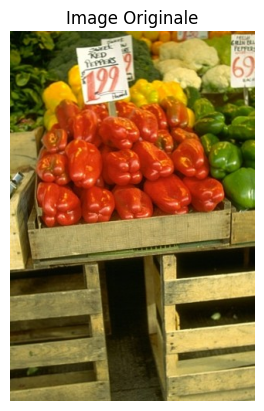

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chargement d'une image
img=cv2.imread('25098.jpg')
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image Originale')
plt.axis("off")
plt.show()

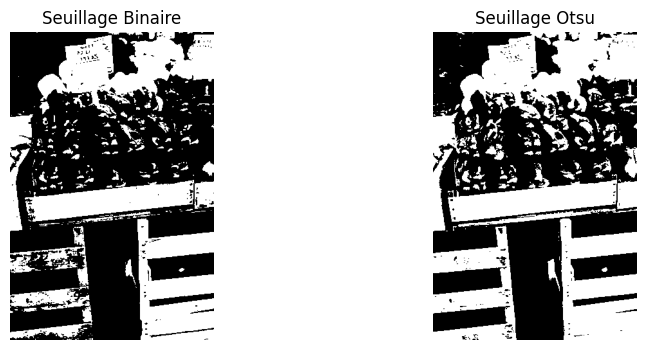

In [ ]:
#   Seuillage global (binaire ou Otsu)
ret1, th1=cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
ret2, th2=cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(th1, cmap='gray')
plt.title('Seuillage Binaire')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(th2, cmap='gray')
plt.title('Seuillage Otsu')
plt.axis("off")

plt.show()

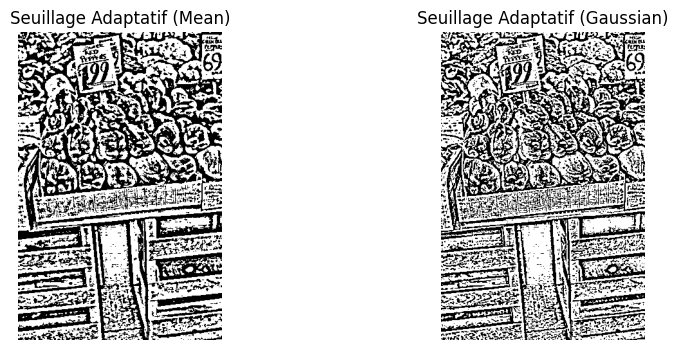

In [ ]:
#   Seuillage adaptatif (mean ou gaussian)
th3=cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th4=cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(th3, cmap='gray')
plt.title('Seuillage Adaptatif (Mean)')
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(th4, cmap='gray')
plt.title('Seuillage Adaptatif (Gaussian)')
plt.axis("off")

plt.show()

### Partie 2 : K-means Clustering

1. Prétraiter l’image pour en extraire les couleurs sous forme de vecteurs
2. Appliquer l’algorithme K-means avec OpenCV
3. Afficher les résultats de la segmentation

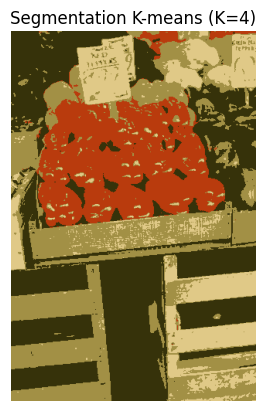

In [ ]:
#   Appliquer cv2.kmeans pour segmenter l’image en k régions
# 1. Prétraiter l’image
z= img.reshape((-1, 3))
z=np.float32(z)

# 2. K-means

criteria=(cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 10, 1.0)

k=4

ret, label, center= cv2.kmeans(z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center=np.uint8(center)

res=center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title(f'Segmentation K-means (K={k})')
plt.axis('off')
plt.show()


### Partie 3 : Mean-Shift

1. Appliquer Mean-Shift (avec `cv2.pyrMeanShiftFiltering()`)
2. Comparer visuellement avec les résultats du K-means

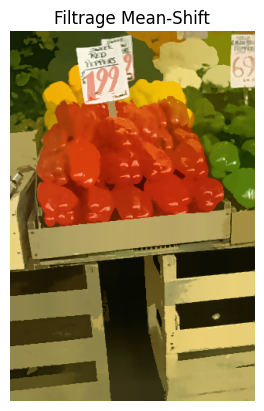

In [ ]:
#   Appliquer Mean-Shift pour lisser et segmenter une image couleur
#Application du filtrage Mean-Shift

mean_shift=cv2.pyrMeanShiftFiltering(img, 20, 40)

plt.imshow(cv2.cvtColor(mean_shift, cv2.COLOR_BGR2RGB))
plt.title('Filtrage Mean-Shift')
plt.axis('off')
plt.show()